In [1]:
from datetime import datetime
import numpy as np
import yaml

from IPython.display import Image, display
import ROOT

In [6]:
# Intialise the files
with open('./analysis_config.yaml', "r") as config_file:
        config = yaml.safe_load(config_file)

filenameslist = []
filetypeslist = []
for s_name, s_info in config['samples'].items():
    filenameslist += [f'./OutHistoFiles/hists_{s_name}.root']
    filetypeslist += [s_info['type']]

# colourlist = [ROOT.kRed, ROOT.kRed+2, ROOT.kYellow+4, ROOT.kYellow-1, ROOT.kYellow-5, ROOT.kYellow-6, ROOT.kYellow-8]
open_infiles = [ROOT.TFile.Open(filename) for filename in filenameslist]

for filename, filetype in list(zip(filenameslist, filetypeslist)):
    print(filename, filetype)

legendstrings = ['sum total', 'pdgId = 22', 'pdgId = 130', 'pdgId = 211', 'pdgId = 11', 'pdgId = 13']

./OutHistoFiles/hists_DYToLL_M50_PU0.root dytoll
./OutHistoFiles/hists_DYToLL_M50_PU200.root dytoll
./OutHistoFiles/hists_MinBias_PU200.root qcd


In [7]:
def plotbyvar(varlist, binedges, *, logy=False, logx=False, normalise=False):
    # Create a canvas
    now_str = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    binedges = np.array(binedges, dtype=np.float64)

    c = ROOT.TCanvas("c"+now_str, "c"+now_str, 800, 600)
    ROOT.gStyle.SetOptStat(0)
    if logy:
        c.SetLogy()
    if logx:
        c.SetLogx()
    legend = ROOT.TLegend(0.6, 0.7, 0.8, 0.9)

    varhists = [file.Get(varlist[i]) for i, file in enumerate(open_infiles)]
    var = varlist[0].split('_')[0]

    for i, hist in enumerate(varhists):
        newhist = hist.Rebin(len(binedges)-1, var+'_rebinned', binedges)
        #Include underflow and overflow
        newhist.GetXaxis().SetRange(0, newhist.GetNbinsX()+1)

        newhist.GetXaxis().SetTitle(newhist.GetTitle())
        if normalise:
            newhist.GetYaxis().SetTitle("normalised events")
        else:
            newhist.GetYaxis().SetTitle("events")
        newhist.SetTitle('')

        # newhist.SetLineColor(colourlist[i])
        newhist.SetLineWidth(4)

        if normalise:
            newhist.Scale(1.0 / newhist.Integral())
            

        newhist.Draw("HIST SAME E1")

        legend.AddEntry(newhist, filenameslist[i][22:-5], "l")

    legend.Draw()
    c.Update()

    plotname = f"nb_plots/{var}_{now_str}.png"
    c.SaveAs(plotname)
    return plotname


def plotbysample(varlist, samplenum, binedges, *, logy=False, logx=False, normalise=False):
    # Create a canvas
    now_str = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    binedges = np.array(binedges, dtype=np.float64)

    c = ROOT.TCanvas("c"+now_str, "c"+now_str, 800, 600)
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetPalette(ROOT.kRainbow)
    nColors = ROOT.gStyle.GetNumberContours()
    if logy:
        c.SetLogy()
    if logx:
        c.SetLogx()
    legend = ROOT.TLegend(0.6, 0.7, 0.8, 0.9)

    sample = open_infiles[samplenum]

    varhists = [sample.Get(var) for var in varlist]
    var = f'{varhists[0].GetTitle()}_{samplenum}'

    for i, hist in enumerate(varhists):
        newhist = hist.Rebin(len(binedges)-1, var+'_rebinned', binedges)
        #Include underflow and overflow
        newhist.GetXaxis().SetRange(0, newhist.GetNbinsX()+1)

        newhist.GetXaxis().SetTitle(newhist.GetTitle())
        if normalise:
            newhist.GetYaxis().SetTitle("normalised events")
        else:
            newhist.GetYaxis().SetTitle("events")
        newhist.SetTitle('')

        newhist.SetLineColor(i+1)
        newhist.SetLineWidth(4)

        if normalise:
            integral = newhist.Integral()
            if integral != 0:
                newhist.Scale(1.0 / integral)
            newhist.SetMaximum(1)
            newhist.SetMinimum(2e-5)

        newhist.Draw("HIST SAME E1")

        legend.AddEntry(newhist, legendstrings[i], "l")

    legend.Draw()
    c.Update()

    plotname = f"nb_plots/{var}_{now_str}.png"
    c.SaveAs(plotname)
    return plotname

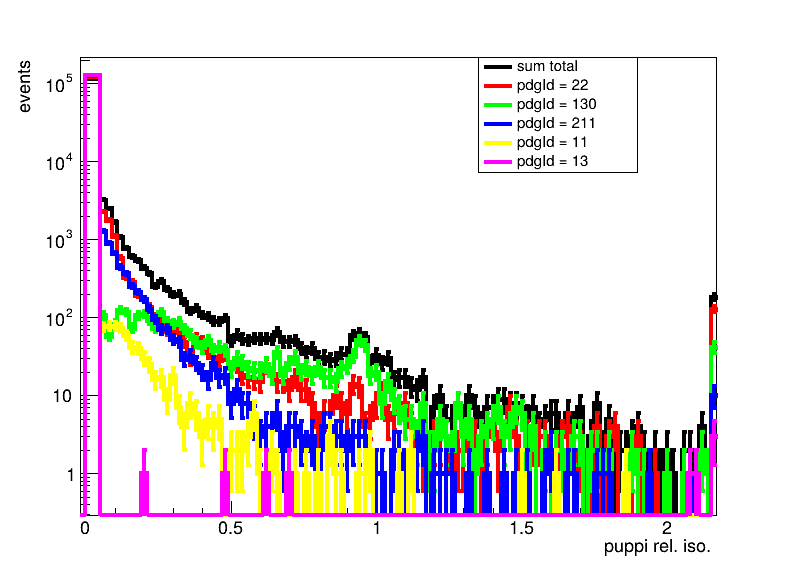

Info in <TCanvas::Print>: png file nb_plots/puppi rel. iso._0_2025_05_19_16_30_36.png has been created


In [8]:
isostrs = ['isotot', 'iso22', 'iso130', 'iso211', 'iso11', 'iso13']
isovarlist = [f'genDYEBTkEl1_TkEleL2_MCH_El1_Re_dRmin0_02_dRmax0_4_{isostr}_puppiIso' for isostr in isostrs]
isovarplot = plotbysample(isovarlist, 0,
                        #   np.arange(0, 2.15, 0.01),
                          np.concatenate((np.arange(0, 0.05, 0.05), np.arange(0.05, 2.17, 0.02) )),
             logy=True, normalise=False)
display(Image(filename=isovarplot))

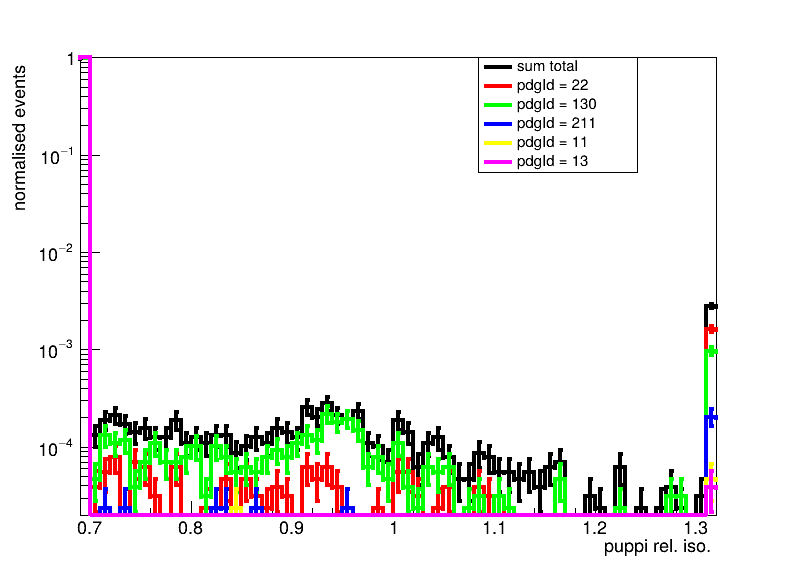

Info in <TCanvas::Print>: png file nb_plots/puppi rel. iso._0_2025_05_19_16_30_42.png has been created


In [9]:
isostrs = ['isotot', 'iso22', 'iso130', 'iso211', 'iso11', 'iso13']
isovarlist = [f'genDYEBTkEl1_TkEleL2_MCH_El1_Re_dRmin0_02_dRmax0_4_{isostr}_puppiIso' for isostr in isostrs]
isovarplot = plotbysample(isovarlist, 0,
                          np.arange(0.7, 1.31, 0.01),
                          # np.concatenate((np.arange(0, 0.05, 0.05), np.arange(0.05, 2.17, 0.02) )),
             logy=True, normalise=True)
display(Image(filename=isovarplot))

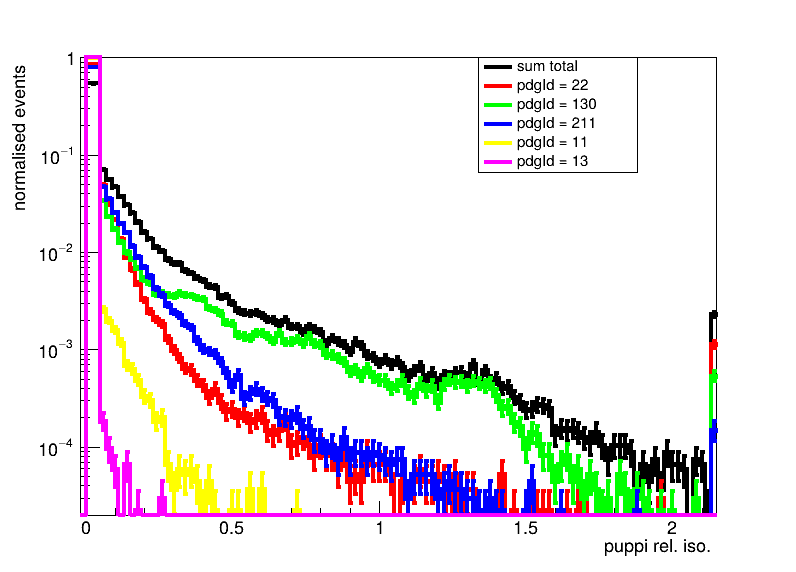

Info in <TCanvas::Print>: png file nb_plots/puppi rel. iso._1_2025_05_19_16_30_56.png has been created


In [10]:
isostrs = ['isotot', 'iso22', 'iso130', 'iso211', 'iso11', 'iso13']
isovarlist = [f'genDYEBTkEl1_TkEleL2_MCH_El1_Re_dRmin0_02_dRmax0_4_{isostr}_puppiIso' for isostr in isostrs]
isovarplot = plotbysample(isovarlist, 1,
                          np.concatenate((np.arange(0, 0.05, 0.05), np.arange(0.05, 2.15, 0.02) )),
                          logy=True, normalise=True)
display(Image(filename=isovarplot))

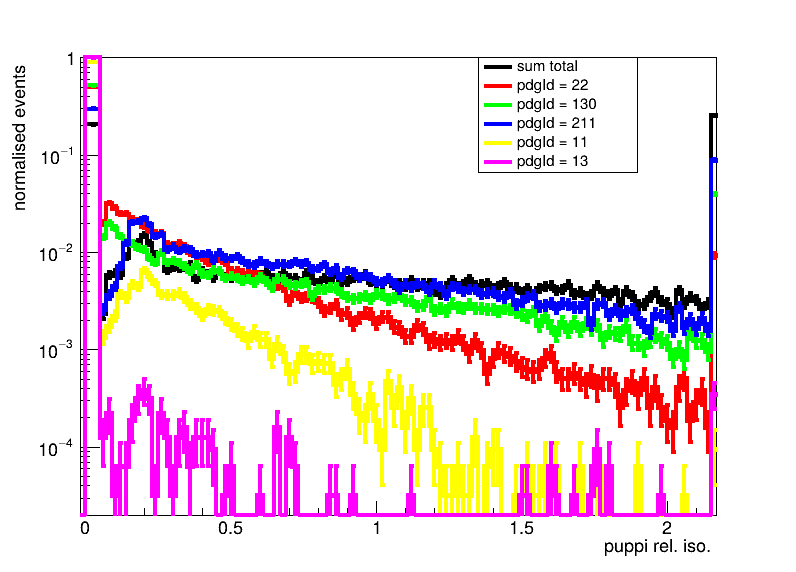

Info in <TCanvas::Print>: png file nb_plots/puppi rel. iso._2_2025_05_19_16_31_02.png has been created


In [11]:
isostrs = ['isotot', 'iso22', 'iso130', 'iso211', 'iso11', 'iso13']
isovarlist = [f'tkelEBpt10_TkEleL2_TkElEBPt10_El1_Re_dRmin0_02_dRmax0_4_{isostr}_puppiIso' for isostr in isostrs]
isovarplot = plotbysample(isovarlist, 2,
            # np.arange(0.8, 1.11, 0.01),
             np.concatenate((np.arange(0, 0.05, 0.05), np.arange(0.05, 2.17, 0.02) )),
             logy=True, normalise=True)
display(Image(filename=isovarplot))

In [43]:
def ploteff(refvar, targetvar, binedges, *, logy=False, logx=False):
    # Create a canvas
    now_str = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    binedges = np.array(binedges, dtype=np.float64)

    c = ROOT.TCanvas("c"+now_str, "c"+now_str, 800, 600)
    ROOT.gStyle.SetOptStat(0)
    c.Divide(2, 2)

    refvarhists = [file.Get(refvar) for i, file in enumerate(open_infiles) if filetypeslist[i] == 'dytoll']
    targetvarhists = [file.Get(targetvar) for i, file in enumerate(open_infiles) if filetypeslist[i] == 'dytoll']
    plot_eff = [None]*len(refvarhists)

    for i, _ in enumerate(refvarhists):
        if i > 3: 
            break
        c.cd(2*i+1)
        if logy:
            ROOT.gPad.SetLogy()
        if logx:
            ROOT.gPad.SetLogx()
        ROOT.gPad.SetGrid()
        
        newrefvarhist = refvarhists[i].Rebin(len(binedges)-1, refvar+'_rebinned', binedges)
        newtargetvarhist = targetvarhists[i].Rebin(len(binedges)-1, targetvar+'_rebinned', binedges)

        newrefvarhist.GetXaxis().SetTitle(newrefvarhist.GetTitle())
        newrefvarhist.GetYaxis().SetTitle('events')
        newrefvarhist.SetTitle('')

        newrefvarhist.SetLineColor(ROOT.kBlue)
        newrefvarhist.SetLineWidth(2)
        newtargetvarhist.SetLineColor(ROOT.kRed)
        newtargetvarhist.SetLineWidth(2)

        newrefvarhist.SetMinimum(1) 

        newrefvarhist.Draw("HIST SAME E1")
        newtargetvarhist.Draw("HIST SAME E1")

        c.cd(2*i+2)
        if logx:
            ROOT.gPad.SetLogx()
        ROOT.gPad.SetGrid()
        
        plot_eff[i] = ROOT.TEfficiency(newtargetvarhist, newrefvarhist)

        plot_eff[i].SetLineWidth(2)

        plot_eff[i].Draw("AP")

        ROOT.gPad.Update()
        plot_eff[i].GetPaintedGraph().SetMinimum(0.0)
        plot_eff[i].GetPaintedGraph().SetMaximum(1.1)

        c.Update()

    plotname = f"nb_plots/comapre_{targetvar}_{now_str}.png"
    c.SaveAs(plotname)
    return plotname   

In [44]:
pteff = ploteff('GenElgenEB_pt', 'GenElgenEB_TkEleL2matched_pt', 
                np.concatenate( (np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 1100, 100)) ),
                logy=True, logx=True)
display(Image(filename=pteff))
pteff = ploteff('GenElgenEB_pt', 'GenElgenEB_TkEleL2matched_pt', 
                np.arange(0, 101, 1),
                logy=True, logx=False)
display(Image(filename=pteff))

AttributeError: 'TObject' object has no attribute 'Rebin'

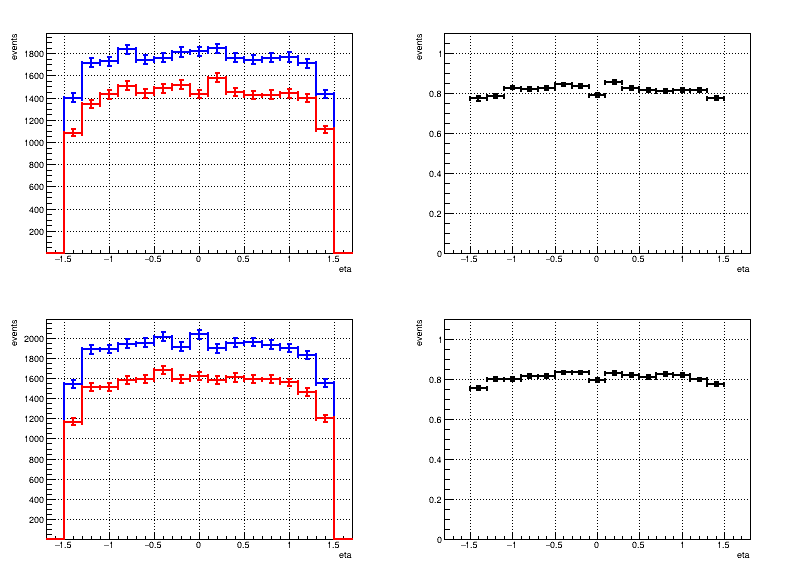

Info in <TCanvas::Print>: png file nb_plots/comapre_GenElgenEB_TkEleL2matched_eta_2025_04_30_15_43_01.png has been created


In [ ]:
etaeff = ploteff('GenElgenEB_eta', 'GenElgenEB_TkEleL2matched_eta', np.arange(-1.7, 1.9, 0.2))
display(Image(filename=etaeff))

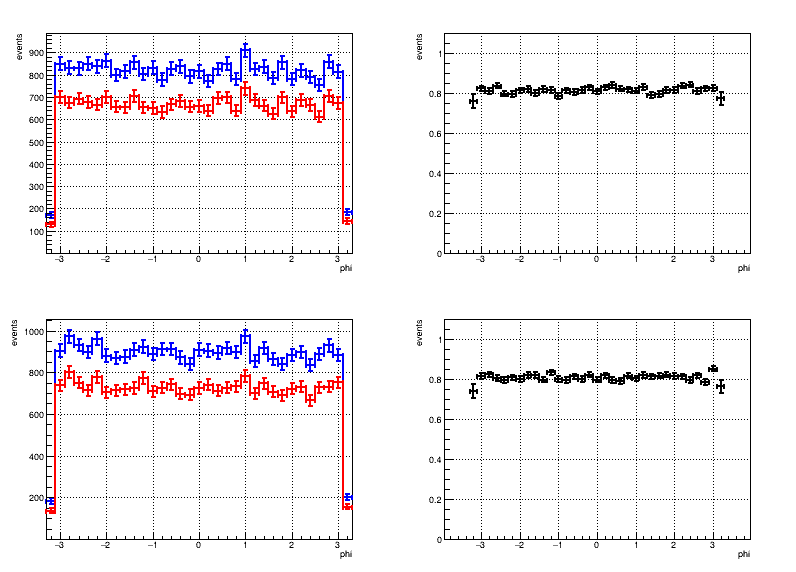

Info in <TCanvas::Print>: png file nb_plots/comapre_GenElgenEB_TkEleL2matched_phi_2025_04_30_15_43_21.png has been created


In [ ]:
phieff = ploteff('GenElgenEB_phi', 'GenElgenEB_TkEleL2matched_phi', np.arange(-3.3, 3.5, 0.2))
display(Image(filename=phieff))

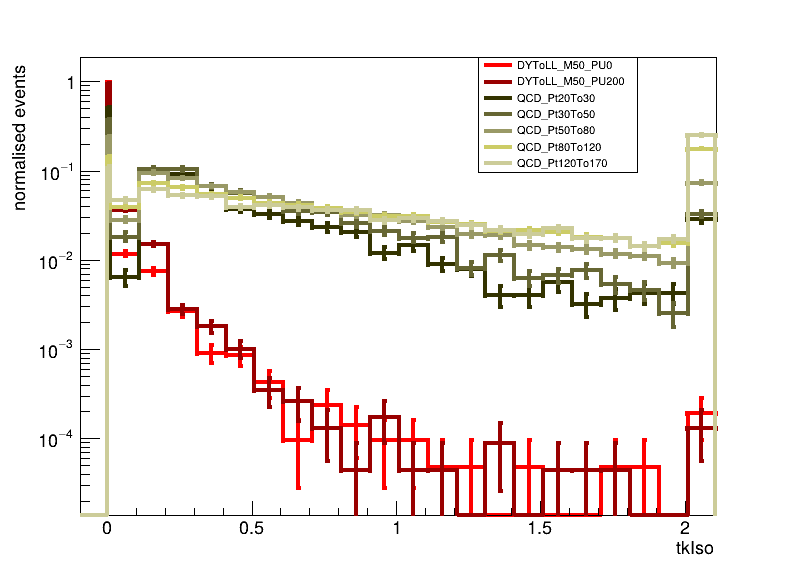

Info in <TCanvas::Print>: png file nb_plots/TkEleL2_2025_04_30_16_18_40.png has been created


In [ ]:
tkisovarlist = ['TkEleL2_GenElgenEBmatched_tkIso']*2 + ['TkEleL2TkElPt10EB_tkIso']*5
tkisoplot = plotbyvar(tkisovarlist, 
                   np.concatenate((np.arange(0,0.01, 0.01), np.arange(0.01, 2.11, 0.1) )), 
                   logy=True, normalise=True)
display(Image(filename=tkisoplot))

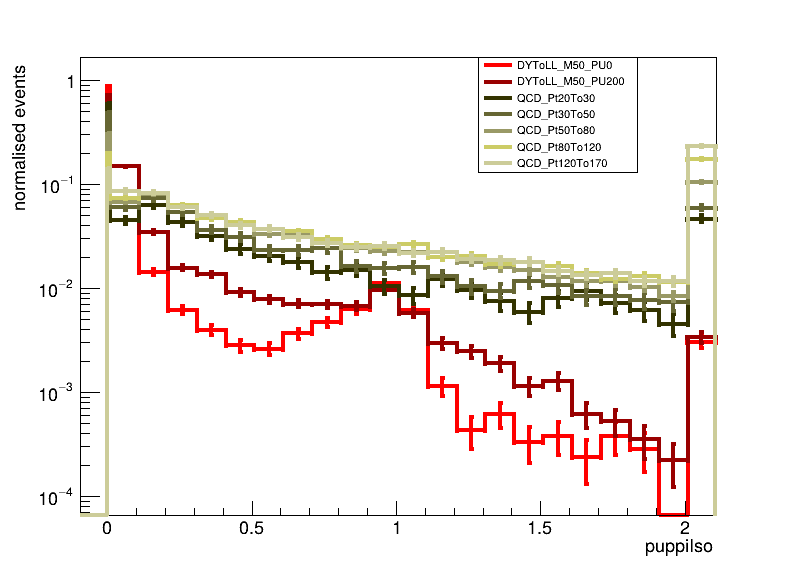

Info in <TCanvas::Print>: png file nb_plots/TkEleL2_2025_04_30_16_18_40.png has been created


In [ ]:
puppiisovarlist = ['TkEleL2_GenElgenEBmatched_puppiIso']*2 + ['TkEleL2TkElPt10EB_puppiIso']*5
puppiisoplot = plotbyvar(puppiisovarlist, 
                      np.concatenate((np.arange(0,0.01, 0.01), np.arange(0.01, 2.11, 0.1) )), 
                      logy=True, normalise=True)
display(Image(filename=puppiisoplot))

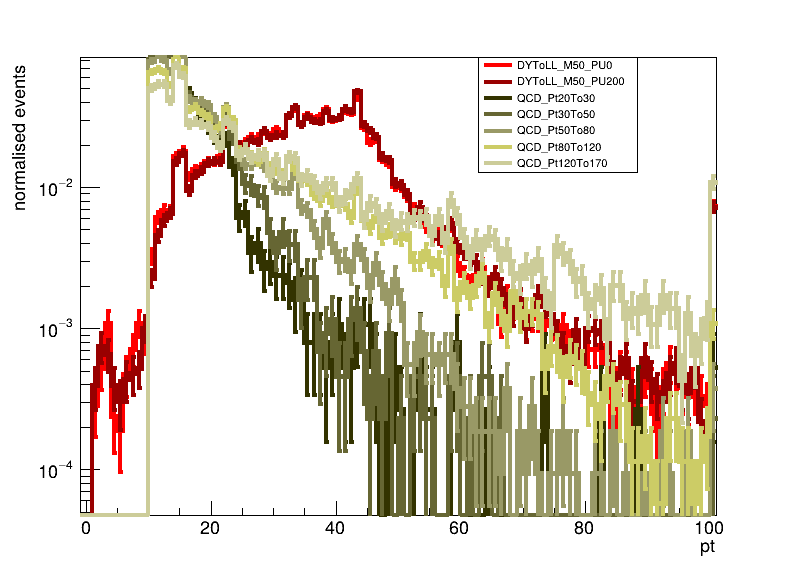

Info in <TCanvas::Print>: png file nb_plots/TkEleL2_2025_04_30_16_18_43.png has been created


In [ ]:
ptvarlist = ['TkEleL2_GenElgenEBmatched_pt']*2 + ['TkEleL2TkElPt10EB_pt']*5
ptplot = plotbyvar(ptvarlist, 
                np.arange(0, 101, 1),
                logy=True, normalise=True)
display(Image(filename=ptplot))

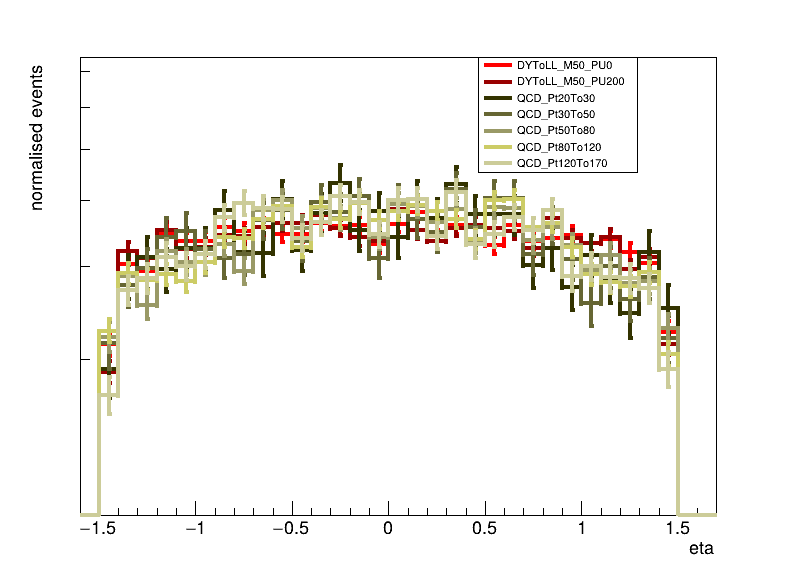

Info in <TCanvas::Print>: png file nb_plots/TkEleL2_2025_04_30_16_18_47.png has been created


In [ ]:
etavarlist = ['TkEleL2_GenElgenEBmatched_eta']*2 + ['TkEleL2TkElPt10EB_eta']*5
etaplot = plotbyvar(etavarlist, 
                np.arange(-1.5, 1.7, 0.1),
                logy=True, normalise=True)
display(Image(filename=etaplot))

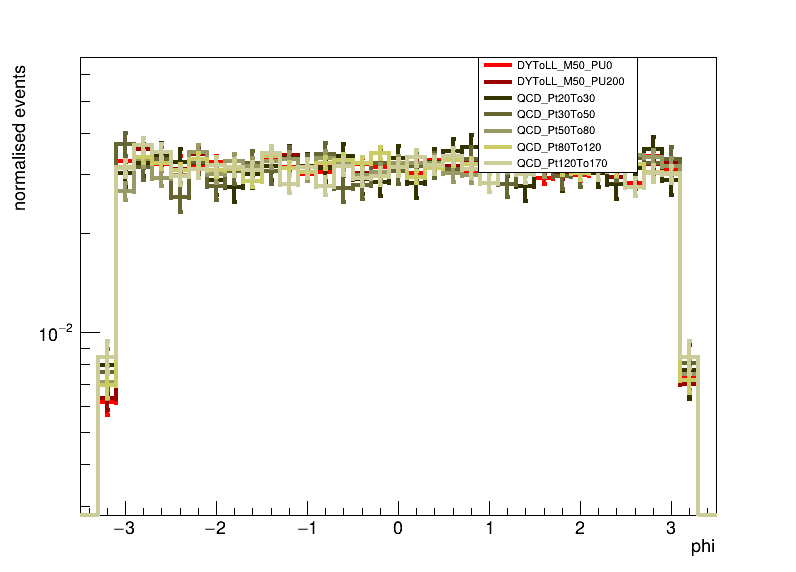

Info in <TCanvas::Print>: png file nb_plots/TkEleL2_2025_04_30_16_18_50.png has been created


In [ ]:
phivarlist = ['TkEleL2_GenElgenEBmatched_phi']*2 + ['TkEleL2TkElPt10EB_phi']*5
phiplot = plotbyvar(phivarlist, 
                np.arange(-3.3, 3.5, 0.2),
                logy=True, normalise=True)
display(Image(filename=phiplot))

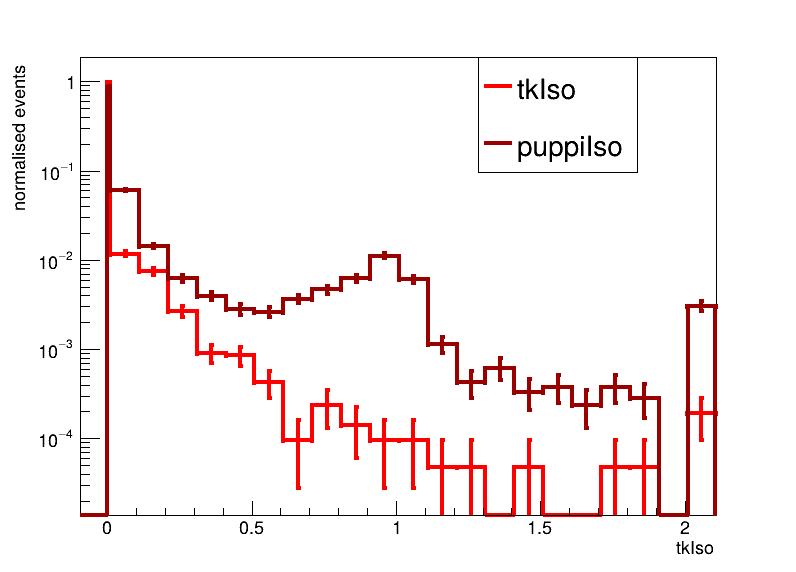

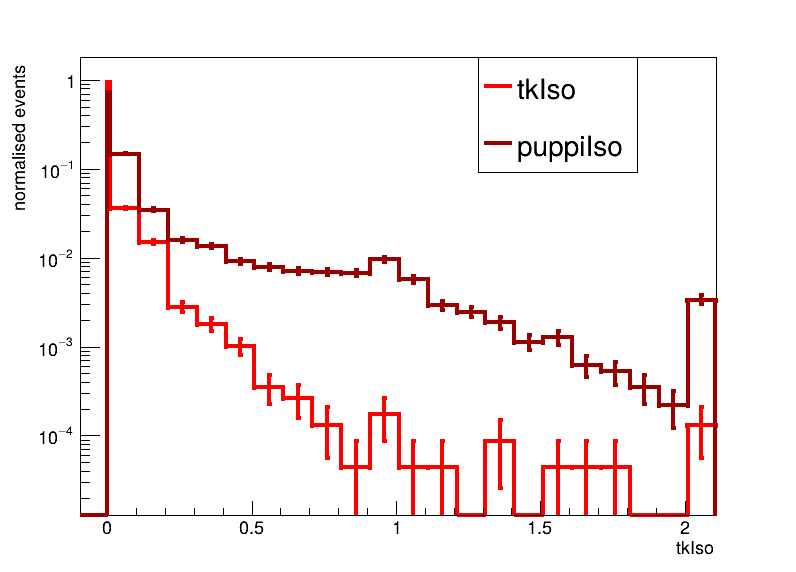

Info in <TCanvas::Print>: png file nb_plots/tkIso_0_2025_04_30_16_35_00.png has been created
Info in <TCanvas::Print>: png file nb_plots/tkIso_1_2025_04_30_16_35_00.png has been created


In [ ]:
isovarlist = ['TkEleL2_GenElgenEBmatched_tkIso', 'TkEleL2_GenElgenEBmatched_puppiIso']
for i in range(2):
    isoplot = plotbysample(isovarlist, i, 
                    np.concatenate((np.arange(0,0.01, 0.01), np.arange(0.01, 2.11, 0.1) )), 
                    logy=True, normalise=True)
    display(Image(filename=isoplot))

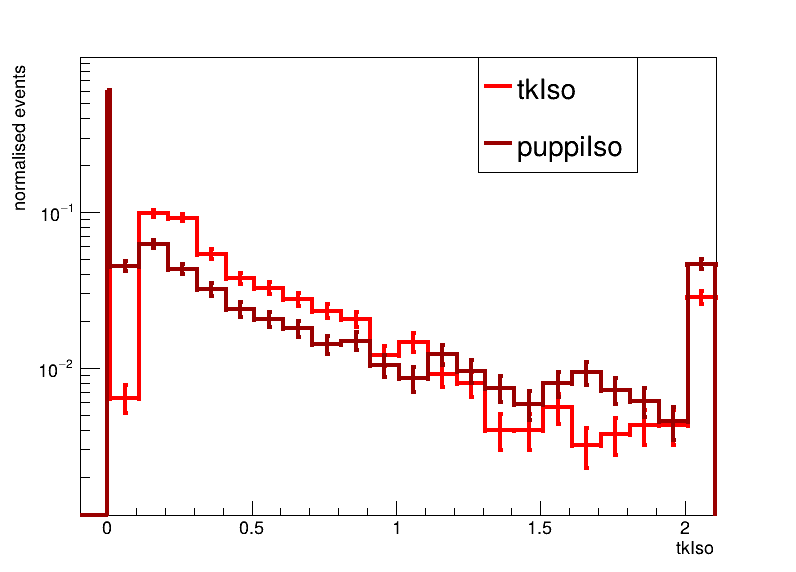

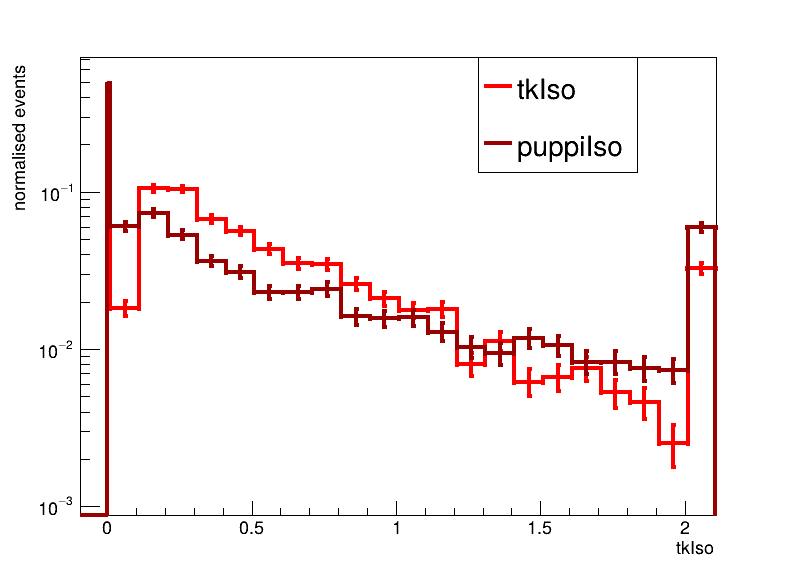

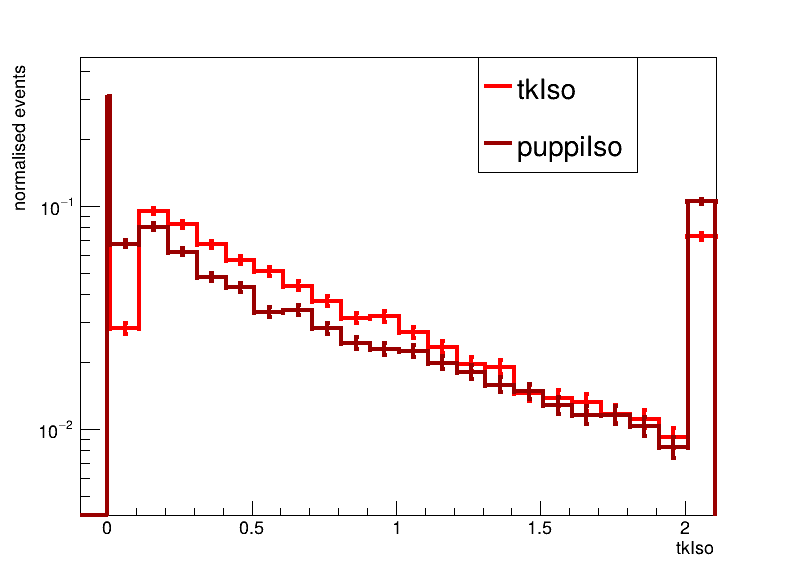

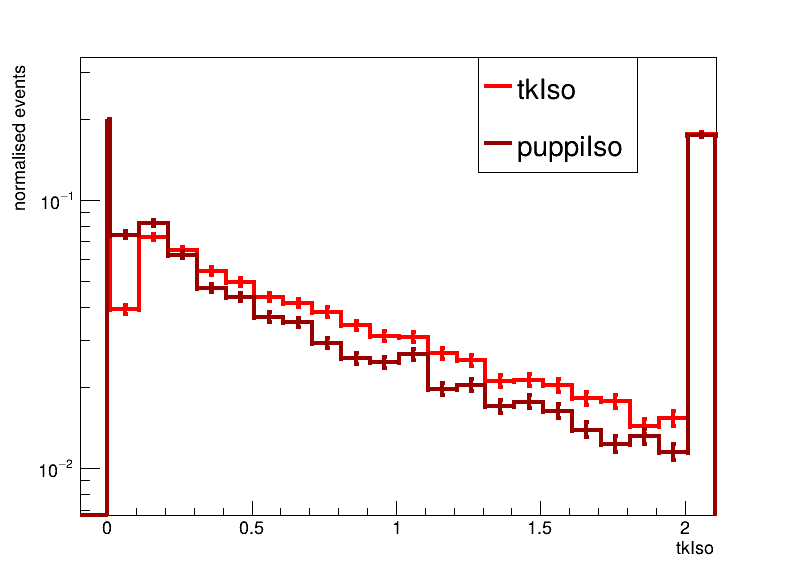

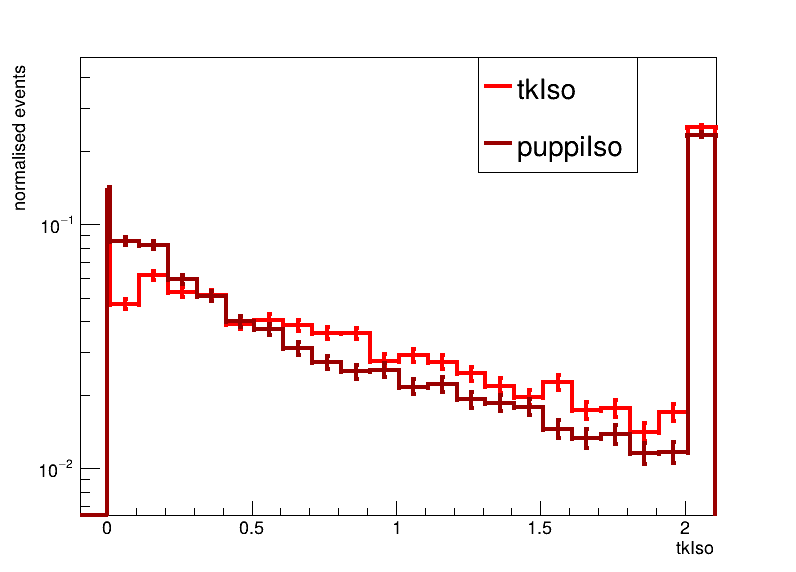

Info in <TCanvas::Print>: png file nb_plots/tkIso_2_2025_04_30_16_36_16.png has been created
Info in <TCanvas::Print>: png file nb_plots/tkIso_3_2025_04_30_16_36_16.png has been created
Info in <TCanvas::Print>: png file nb_plots/tkIso_4_2025_04_30_16_36_16.png has been created
Info in <TCanvas::Print>: png file nb_plots/tkIso_5_2025_04_30_16_36_16.png has been created
Info in <TCanvas::Print>: png file nb_plots/tkIso_6_2025_04_30_16_36_16.png has been created


In [ ]:
isovarlist = ['TkEleL2TkElPt10EB_tkIso', 'TkEleL2TkElPt10EB_puppiIso']
for i in range(5):
    isoplot = plotbysample(isovarlist, 2+i, 
                    np.concatenate((np.arange(0,0.01, 0.01), np.arange(0.01, 2.11, 0.1) )), 
                    logy=True, normalise=True)
    display(Image(filename=isoplot))

In [45]:
dRmin_list = np.arange(0.01, 0.2, 0.01)
for dRmin in dRmin_list:
    puppiisovarlist = [f'TkEleL2_GenElgenEBmatched_recalcPuppiIso_dRmin{str(dRmin).replace('.', '_')}']*2 + [f'TkEleL2TkElPt10EB_recalcPuppiIso_dRmin{str(dRmin).replace('.', '_')}']*5
    puppiisoplot = plotbyvar(puppiisovarlist, 
                        np.concatenate((np.arange(0,0.01, 0.01), np.arange(0.01, 2.11, 0.1) )), 
                        logy=True, normalise=True)
    display(Image(filename=puppiisoplot))

AttributeError: 'TObject' object has no attribute 'Rebin'